In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [142]:
df = pd.read_csv('data.csv')

In [143]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB


In [145]:
df['Interest'].unique()

array(['Arts', 'Unknown', 'Others', 'Sports', 'Technology'], dtype=object)

In [146]:
#Binary Encode
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [147]:
#One-Hot Encode
df = df.join(pd.get_dummies(df['Interest'], prefix='Interest')).drop('Interest', axis=1)

In [148]:
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)

In [149]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
0,21.0,0,1,5.89208,2.144395,7.32363,5.462224,ENTP,1,0,0,0,0
1,24.0,0,1,2.48366,3.206188,8.06876,3.765012,INTP,0,0,0,0,1
2,26.0,0,1,7.02910,6.469302,4.16472,5.454442,ESFP,0,1,0,0,0
3,30.0,1,0,5.46525,4.179244,2.82487,5.080477,ENFJ,0,0,1,0,0
4,31.0,0,0,3.59804,6.189259,5.31347,3.677984,ISFP,0,1,0,0,0


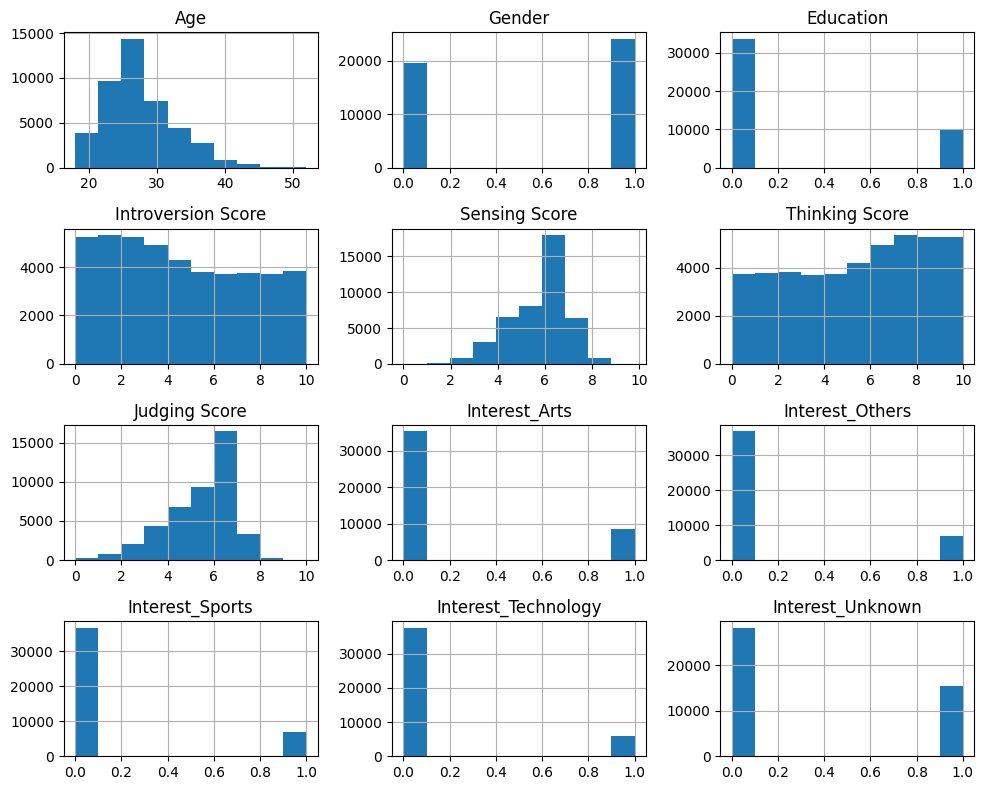

In [150]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [151]:
df.columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Personality', 'Interest_Arts',
       'Interest_Others', 'Interest_Sports', 'Interest_Technology',
       'Interest_Unknown'],
      dtype='object')

In [152]:
X = df.drop('Personality', axis=1)
y = df['Personality']

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [154]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [155]:
model.score(X_test, y_test)

0.9029603383243799

In [156]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

        ENFJ       0.95      0.90      0.92       531
        ENFP       0.94      0.85      0.89       517
        ENTJ       0.92      0.90      0.91       559
        ENTP       0.92      0.85      0.88       571
        ESFJ       0.88      0.91      0.90       532
        ESFP       0.90      0.90      0.90       547
        ESTJ       0.95      0.91      0.93       588
        ESTP       0.90      0.91      0.90       555
        INFJ       0.94      0.91      0.92       540
        INFP       0.89      0.92      0.91       558
        INTJ       0.93      0.90      0.91       550
        INTP       0.87      0.87      0.87       551
        ISFJ       0.88      0.92      0.90       574
        ISFP       0.86      0.92      0.89       513
        ISTJ       0.89      0.97      0.93       509
        ISTP       0.86      0.91      0.88       554

    accuracy                           0.90      8749
   macro avg       0.90   

In [157]:
sorted_val = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True))

sorted_val

{'Introversion Score': 0.23243263343733292,
 'Thinking Score': 0.22751075742793142,
 'Judging Score': 0.18619110880398826,
 'Sensing Score': 0.1845080535970398,
 'Age': 0.049841588967103154,
 'Education': 0.047239700053441205,
 'Interest_Sports': 0.027474505543955377,
 'Gender': 0.019172579118183528,
 'Interest_Arts': 0.010300077490340287,
 'Interest_Unknown': 0.0064978909404779,
 'Interest_Technology': 0.004475560995788836,
 'Interest_Others': 0.004355543624417361}

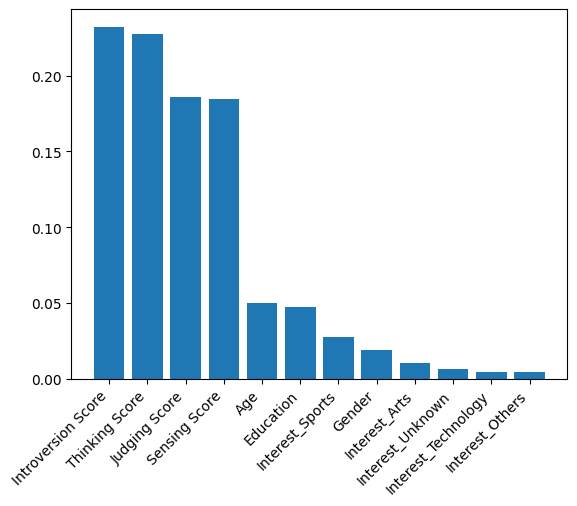

In [158]:
plt.bar(sorted_val.keys(), sorted_val.values())
plt.xticks(rotation=45, ha='right')

plt.show()

In [159]:
X = df.drop(['Age', 'Gender', 'Education', 'Personality', 'Interest_Arts',
       'Interest_Others', 'Interest_Sports', 'Interest_Technology',
       'Interest_Unknown'], axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7332266544747971